**When thinking about what makes the best neighborhood, we decided to put ourselves in someone elses shoes...**
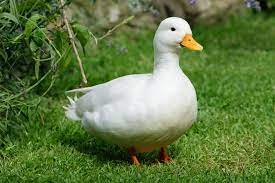

Deciding upon metrics for what makes the best neighborhood for a duck came pretty easily for us..
* Ducks love to waddle! This means that the more acres, the better!
* What duck doesn't love to swim, take a drink, or publicly bath? That's why water features a huge plus?
* Hunting season can be scary! And so can petty theft! That's why a low crime rate is key!

Of course, we considered other options (traffic, bread availibility, hunting statistics...) but decided these three were our golden combination. We found three datasets to correspond with our three metrics.
* Pittsburgh neighborhoods (contains acres)
* Water features in Pittsburgh neighborhoods 
* Crime rates in pittsburgh neighborhoods

In [3]:
import pandas as pd

# Acres

### Create a bar plot showing neighborhoods with the highest acreage

What duck doesn't love to waddle? And to waddle, you need land. For this purpose, I chose a dataset that included the total number of acres included in each Pittsburgh neighborhood to see which has the most waddle-ability. Data Set: [Neighborhoods](https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff)

In [4]:
acredata = pd.read_csv("neighborhoods.csv")

In [5]:
acreselected = acredata[['hood', 'acres']]
acreselected.head()

,hood,acres
0,Point Breeze North,193.229239
1,Squirrel Hill North,782.981547
2,Garfield,292.726125
3,Bedford Dwellings,112.431551
4,Knoxville,191.759777


In [6]:
acreindexed = acreselected.set_index("hood")
acreindexed.head()

,acres
hood,
Point Breeze North,193.229239
Squirrel Hill North,782.981547
Garfield,292.726125
Bedford Dwellings,112.431551
Knoxville,191.759777


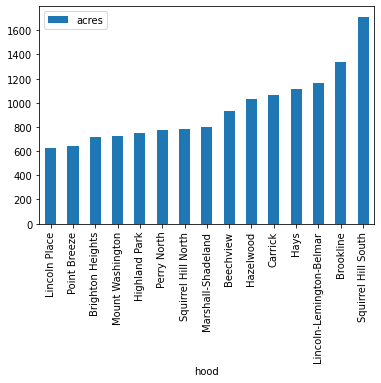

In [9]:
acresorted = acreindexed.sort_values("acres")
acresorted.tail(15).plot(kind='bar')

From the results, we can see that Squirrel Hill South is the clear winner, with a significant lead over the rest. Brookline, Lincoln-Lemington-Belmar, Hays, Carrick, Hazelwood, and Beechview are runners up. These results give us a piece of puzzle of deciding which neighborhood in Pittsburgh reigns supreme (in the eyes of hypothetical ducks).

# Water Features

### Create bar plot of total water features for each neighborhood

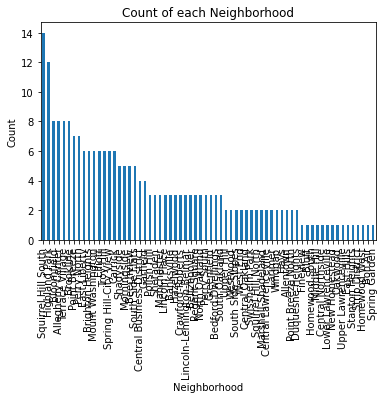

In [13]:
#Import Data Set
waterSet = pd.read_csv("water.tsv", sep="\t")
waterSet.head()
waterSet['neighborhood'].value_counts().sort_values(ascending=False)

# Get neighborhoods from dataSet
neighborhood_counts = waterSet['neighborhood'].value_counts()

# Create a bar plot of total water features for each neighborhood
neighborhood_counts.plot(kind='bar', xlabel='Neighborhood', ylabel='Count', title='Count of each Neighborhood')

### Split each bar by water feature type (Decorative, Drinking Fountain, Spray)

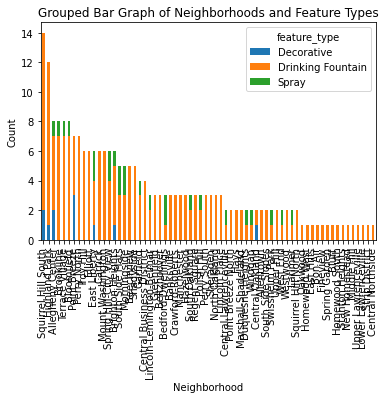

In [23]:
# Create a stacked grouped bar plot
grouped_data.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Grouped Bar Graph of Neighborhoods and Feature Types')

### Sort the graph to be in descending order

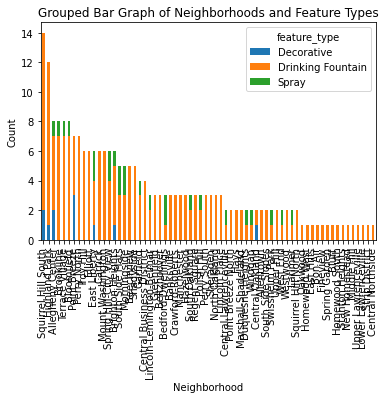

In [27]:
#Sort in descending order

#Create graph
grouped_data.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Grouped Bar Graph of Neighborhoods and Feature Types')

### Show the 15 neighborhoods with the most overall water features

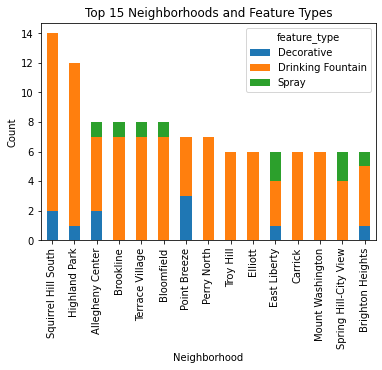

In [25]:
#Show the top 15 neighborhoods
top15 = grouped_data.head(15)
top15.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Top 15 Neighborhoods and Feature Types')

# Crime Rate

# Conclusion

Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

**Tim:** Considering all the given data, it is clear that Squirrel Hill South is the best neighborhood for a duck to live in. It has plently of water features and the largest amount of acres. Both of these features are essential to a duck trying to live its best life. Squirrel Hill South is not an area that I personally visit very often, meaning it would not have been my choice for the best neighborhood in Pittsburgh, however the areas I most frequent are near campus, such as Oakland and Shadyside. Neither of these areas would be very good for ducks as they have limited space and lower water features.